# Logistic Regression
## In this section we will apply the logistic Regression classifier to our data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob 
import os
import sys
import seaborn as sns
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
os.getcwd()

'C:\\Users\\Ganga\\Desktop\\Research\\CDCDiab1\\07-08'

In [3]:
os.chdir('C:\\Users\\Ganga\\Desktop\\Research\\CDCDiab1\\07-08')

In [5]:
# Importing the DataSet
CDCDataset = pd.read_csv('df07_08.csv')
DFreg = CDCDataset

In [6]:
DFreg = DFreg.loc[:,['SEQN','DIQ010','BPQ020','BPQ080']] 

In [7]:
DFreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10149 entries, 0 to 10148
Data columns (total 4 columns):
SEQN      10149 non-null int64
DIQ010    9666 non-null float64
BPQ020    6546 non-null float64
BPQ080    4218 non-null float64
dtypes: float64(3), int64(1)
memory usage: 317.2 KB


In [8]:
# Droping the Missing i.e.'NAN' Values 
DFreg= DFreg.dropna()

In [9]:
DFreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 10148
Data columns (total 4 columns):
SEQN      4218 non-null int64
DIQ010    4218 non-null float64
BPQ020    4218 non-null float64
BPQ080    4218 non-null float64
dtypes: float64(3), int64(1)
memory usage: 164.8 KB


In [10]:
DFreg.to_csv('drop.csv')

In [11]:
DFreg= DFreg.replace(9,2)
DFreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 10148
Data columns (total 4 columns):
SEQN      4218 non-null int64
DIQ010    4218 non-null float64
BPQ020    4218 non-null float64
BPQ080    4218 non-null float64
dtypes: float64(3), int64(1)
memory usage: 164.8 KB


In [12]:
DFreg.to_csv('replace9.csv')

In [13]:
DFreg= DFreg.replace(3,1)
DFreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 10148
Data columns (total 4 columns):
SEQN      4218 non-null int64
DIQ010    4218 non-null float64
BPQ020    4218 non-null float64
BPQ080    4218 non-null float64
dtypes: float64(3), int64(1)
memory usage: 164.8 KB


In [14]:
DFreg.to_csv('replace3.csv')

In [15]:
DFreg.to_csv('Data.csv')

In [163]:
# Locking the data set and selecting the X(Independent) and Y (Dependent) Variable 
X= DFreg.loc[:,['BPQ020','BPQ080']]
y= DFreg.loc[:,['DIQ010']]

In [164]:
X.shape

(4218, 2)

In [165]:
y.shape

(4218, 1)

In [166]:
# Splitting the dataset into training and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=22)

In [167]:
X_train.shape

(2952, 2)

In [168]:
X_test.shape

(1266, 2)

In [169]:
# Fitting Logistic Regression trainning data

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state = 22)
regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=22, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
# Predicting the Training data set accuracy
y_pred = regressor.predict(X_test)

In [171]:
from sklearn.metrics import accuracy_score
print('Accuracy score:' , accuracy_score(y_test, y_pred))

Accuracy score: 0.8151658767772512


In [182]:
# Confusion matrix output
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0  234]
 [   0 1032]]


In [173]:
y_pred.shape
#dfn = y_pred.plot(kind="scatter", x="DIQ010", y="BPQ020")

(1266,)

In [174]:
X_train.to_csv('train.csv')

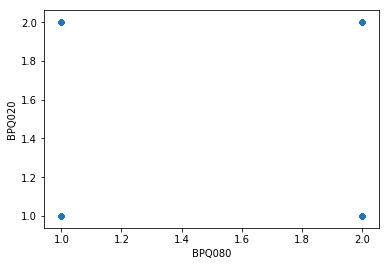

In [175]:
DFreg.plot(kind="scatter", x="BPQ080", y="BPQ020")
#DFreg.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

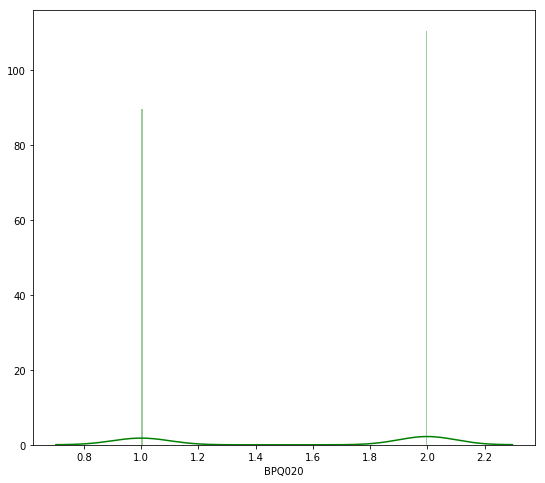

In [176]:
plt.figure(figsize=(9, 8))
sns.distplot(DFreg['BPQ020'], color='g', bins=200, hist_kws={'alpha': 0.4});

ValueError: x and y must be the same size

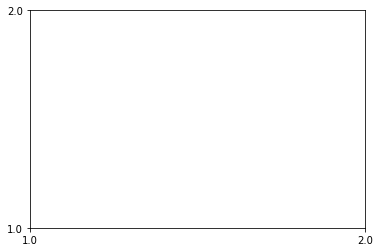

In [182]:
# Visualization of training data
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('CDCDiab (Regression Model)')
plt.xlabel('Blood pressure','Cholestrol level')
plt.ylabel('Diabetes')
plt.show()

In [183]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# Importing the dataset

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting the Regression Model to the dataset
# Create your regressor here

# Predicting a new result
y_pred = regressor.predict(6.5)

# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()